# Урок 6. Градиентный бустинг. AdaBoost

Прежде всего скопируем реализацию градиентного бустинга из лекции.

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)


def residual(y, z):
    return - (z - y)

In [5]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    

def get_error_plot(n_trees, train_err, test_err):
    plt.figure(figsize=(15,8))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.title('MSE dependent on iterations')
    plt.show()

In [8]:
%%time

# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1396.1003671665405
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3092.734712112894
CPU times: user 1min, sys: 364 ms, total: 1min 1s
Wall time: 1min 1s


## Домашнее задание

Выполним сначала третий пункт домашнего задания немного видоизменив функцию `gb_fit`, чтобы обучение градиентного бустинга происходило немного быстрее, что будет полезно при выполнении первого пункта домашнего задания.

3. *Оптимизировать процесс обучения градиентного бустинга, чтобы он занимал меньше времени.

In [9]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
#     predictions = np.array(
#         [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
#     )

    # Будем делать предсказание сразу для всей матрицы
    predictions = sum([eta * alg.predict(X) for alg in trees_list])

    return predictions

In [10]:
%%time

# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1396.1003671665405
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3092.734712112894
CPU times: user 354 ms, sys: 5.52 ms, total: 360 ms
Wall time: 367 ms


Как видим результаты не изменились, а время работы алгоритма сократилось. Будем использовать эту функцию в процессе выполнения первого пункта домашнего задания. 

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

Сначала рассмотрим зависимость ошибки от количества деревьев, зафиксировав параметр максимальной глубины.

In [11]:
train_errors_list = []
test_errors_list = []

# Зафиксируем максимальную глубину деревьев и шаг
max_depth = 3
eta = 0.1

# Зададим возможные значения количества деревьев
n_trees = range(1, 151)

for n in n_trees:
    # Обучаем модель
    trees, train_errors, test_errors = gb_fit(n, max_depth, X_train, X_test, y_train, y_test, eta)
    
    # Находим ошибку на тренировочной выборке и добавляем в соответствующий список
    train_prediction = gb_predict(X_train, trees, eta)
    train_errors_list.append(mean_squared_error(y_train, train_prediction))
    
    # Находим ошибку на тестовой выборке и добавляем в соответствующий список
    test_prediction = gb_predict(X_test, trees, eta)
    test_errors_list.append(mean_squared_error(y_test, test_prediction))

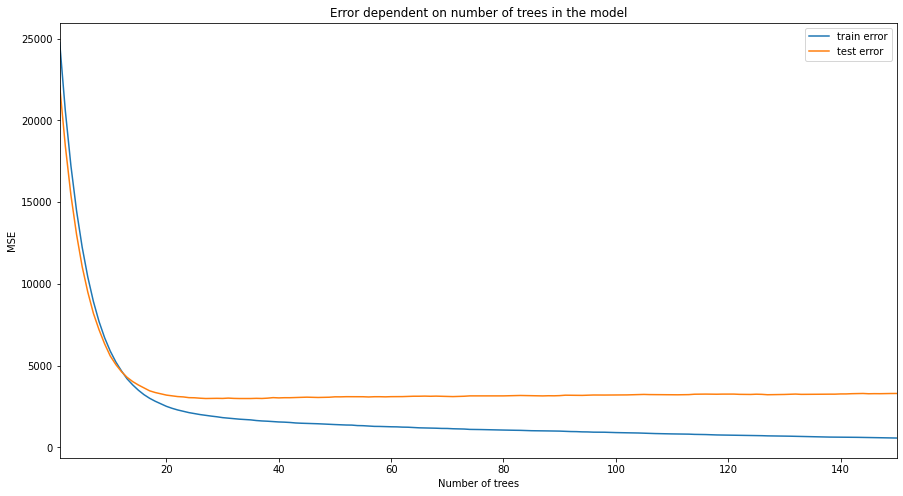

In [12]:
# Строим график с изменением ошибок в зависимости от количества деревьев в ансамбле

plt.figure(figsize=(15, 8))
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.title('Error dependent on number of trees in the model')
plt.xlim(1, 150)
plt.plot(list(range(1, 151)), train_errors_list, label='train error')
plt.plot(list(range(1, 151)), test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

Как видим ошибка на тренировочном датасете постепенно сокращается при увеличении количества деревьев, в то время как ошибка на тестовом датасете практически перестает уменьшаться при использовании более 20 деревьев в ансамбле. На этом отрезке особенно заметно становится переобучение модели при росте используемых деревьев.

Теперь рассмотрим зависимость ошибки от максимальной глубины деревьев в ансамбле, зафиксировав количество деревьев в ансамбле - 20.

In [13]:
train_errors_list = []
test_errors_list = []

# Зафиксируем количество деревьев и шаг
n_trees = 20
eta = 0.1

# Зададим возможные значения максимальной глубины
max_depth_values = range(1, 16)

for depth in max_depth_values:
    # Обучаем модель
    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta)
    
    # Находим ошибку на тренировочной выборке и добавляем в соответствующий список
    train_prediction = gb_predict(X_train, trees, eta)
    train_errors_list.append(mean_squared_error(y_train, train_prediction))
    
    # Находим ошибку на тестовой выборке и добавляем в соответствующий список
    test_prediction = gb_predict(X_test, trees, eta)
    test_errors_list.append(mean_squared_error(y_test, test_prediction))

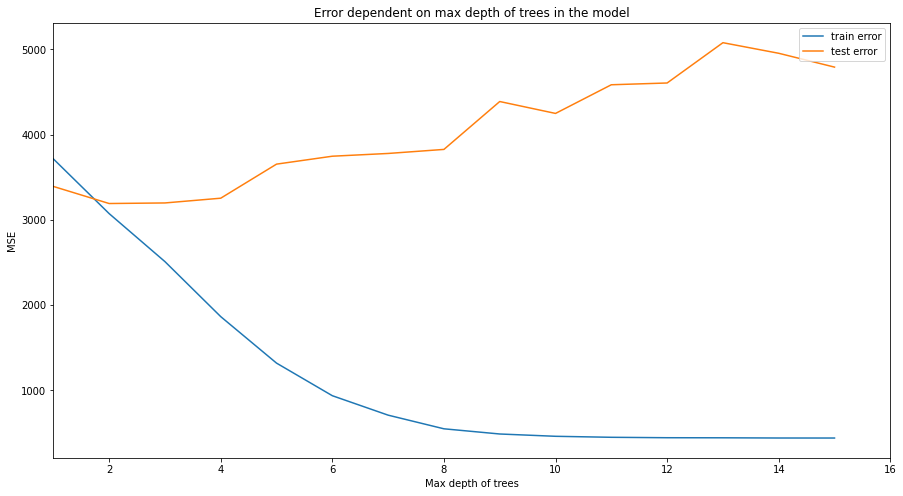

In [14]:
# Строим график с изменением ошибок в зависимости от максимальной глубины деревьев в ансамбле

plt.figure(figsize=(15, 8))
plt.xlabel('Max depth of trees')
plt.ylabel('MSE')
plt.title('Error dependent on max depth of trees in the model')
plt.xlim(1, 16)
plt.plot(list(range(1, 16)), train_errors_list, label='train error')
plt.plot(list(range(1, 16)), test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

Как видим в данном случае наблюдается аналогичная ситуация: ошибка на тренировочном датасете постепенно сокращается при увеличении максимальной глубины деревьев, в то время как ошибка на тестовом датасете после незначительного падения в начале растет, когда мы используем деревья с максимальной глубиной больше 3. На этом отрезке становится особенно ярко заметно переобучение модели.

2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Перепишем функцию, отвечающую за обучение.

In [15]:
def gb_fit_stochastic(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, subsample=0.5):
    np.random.seed(42)
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    n_observations = X_train.shape[0]
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        sample_index = np.random.choice(np.arange(n_observations), size=int(round(n_observations*subsample, 0)),
                                        replace=False)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[sample_index], y_train[sample_index])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[sample_index], residual(y_train[sample_index], target[sample_index]))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Построим модель для градиентного бустинга и визуализируем изменение ошибки.

In [16]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1396.1003671665405
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3092.734712112894


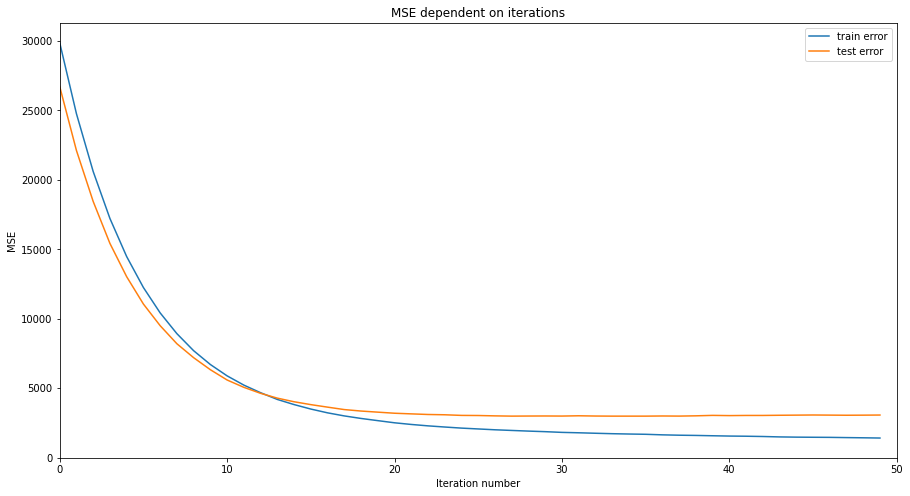

In [17]:
get_error_plot(n_trees, train_errors, test_errors)

Теперь построим модель стохастического градиентного бустинга и произведем аналогичную визуализацию.

In [18]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees_stochastic, train_errors_stochastic, test_errors_stochastic = \
    gb_fit_stochastic(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees_stochastic, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1511.4812472377018
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3045.095656978327


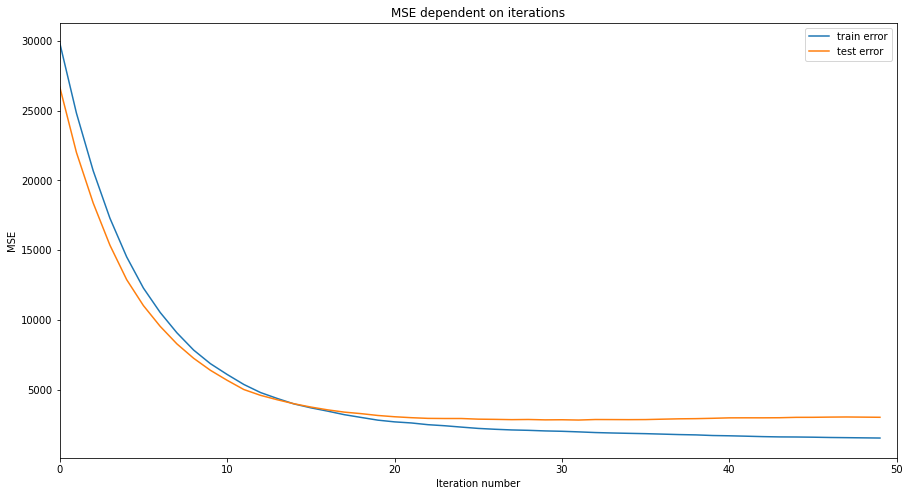

In [19]:
get_error_plot(n_trees, train_errors_stochastic, test_errors_stochastic)

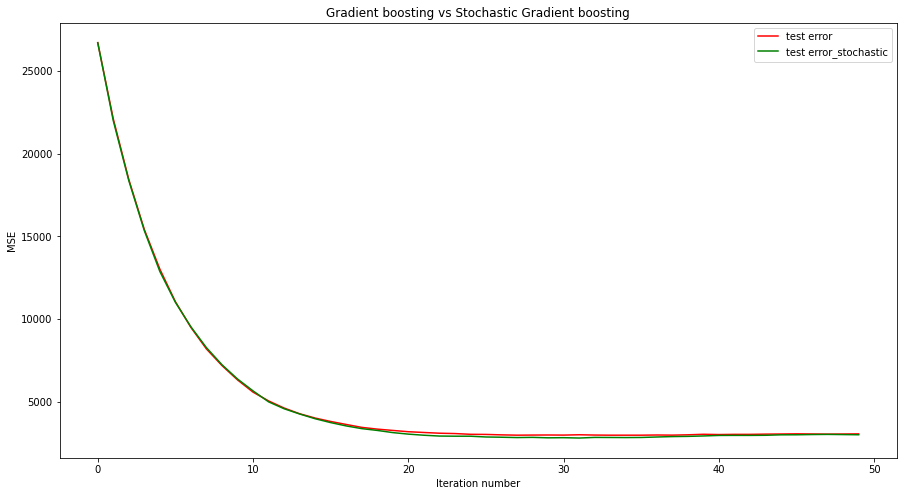

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(list(range(n_trees)), test_errors, label='test error', color='r')
plt.plot(list(range(n_trees)), test_errors_stochastic, label='test error_stochastic', color='g')
plt.legend()
plt.title('Gradient boosting vs Stochastic Gradient boosting')
plt.show()

Как видим полученные графики изменения ошибки практически идентичны, что позволяет говорить о эффективности стохастического градиентного бустинга, так как в его случае вычисления производятся быстрее в силу того, что обучение идет только на части выборки.